Total graphs: 52000
Average nodes: 199.80
Average edges: 198.80
Unique node types: 56
Unique spellings (non-empty): 65970

Top 10 node types:
DECL_REF_EXPR        : 2564387
UNEXPOSED_EXPR       : 2468385
BINARY_OPERATOR      : 1367230
INTEGER_LITERAL      : 961427
ARRAY_SUBSCRIPT_EXPR : 521316
VAR_DECL             : 381674
COMPOUND_STMT        : 328724
UNARY_OPERATOR       : 317951
OVERLOADED_DECL_REF  : 198264
IF_STMT              : 174311

Top 10 spellings:
i                    : 1036442
j                    : 466643
a                    : 414332
n                    : 308246
b                    : 206373
k                    : 174945
m                    : 134891
c                    : 120970
s                    : 94749
p                    : 92059


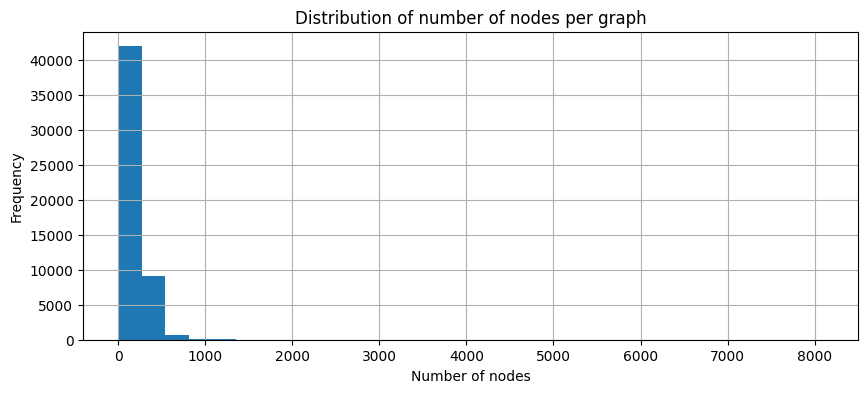

In [1]:
import os
import json
from collections import Counter
import matplotlib.pyplot as plt

GRAPH_DIR = "./../data/graphs"

type_counter = Counter()
spelling_counter = Counter()
num_nodes_list = []
num_edges_list = []

for label in os.listdir(GRAPH_DIR):
    label_dir = os.path.join(GRAPH_DIR, label)
    for file in os.listdir(label_dir):
        with open(os.path.join(label_dir, file), "r", encoding="utf-8") as f:
            graph = json.load(f)

        for node in graph["nodes"]:
            type_counter[node["type"]] += 1
            if node["name"]:
                spelling_counter[node["name"]] += 1

        num_nodes_list.append(len(graph["nodes"]))
        num_edges_list.append(len(graph["edges"]))

# 🧮 Résumé
print(f"Total graphs: {sum(1 for _ in num_nodes_list)}")
print(f"Average nodes: {sum(num_nodes_list)/len(num_nodes_list):.2f}")
print(f"Average edges: {sum(num_edges_list)/len(num_edges_list):.2f}")
print(f"Unique node types: {len(type_counter)}")
print(f"Unique spellings (non-empty): {len(spelling_counter)}")

# 📊 Top 10 node types
print("\nTop 10 node types:")
for t, c in type_counter.most_common(10):
    print(f"{t:20s} : {c}")

# 📊 Top 10 spellings
print("\nTop 10 spellings:")
for s, c in spelling_counter.most_common(10):
    print(f"{s:20s} : {c}")

# 📈 Optionnel : histogramme des tailles de graphes
plt.figure(figsize=(10, 4))
plt.hist(num_nodes_list, bins=30)
plt.title("Distribution of number of nodes per graph")
plt.xlabel("Number of nodes")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
